In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('admission_predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
df.shape

(500, 9)

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [10]:
df.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [11]:
df.isnull().any()

,0
Serial No.,False
GRE Score,False
TOEFL Score,False
University Rating,False
SOP,False
LOR,False
CGPA,False
Research,False
Chance of Admit,False


In [12]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})

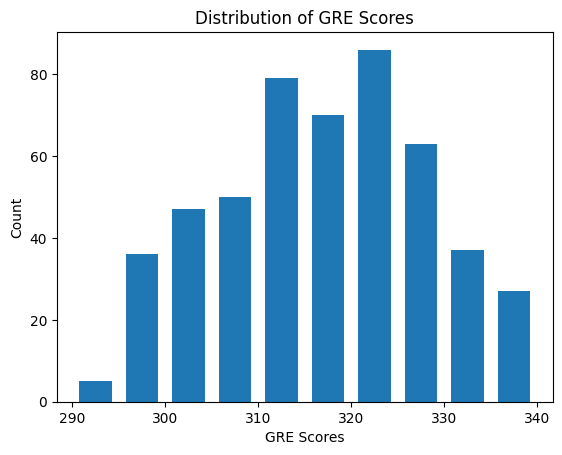

In [13]:
fig = plt.hist(df['GRE'], rwidth=0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

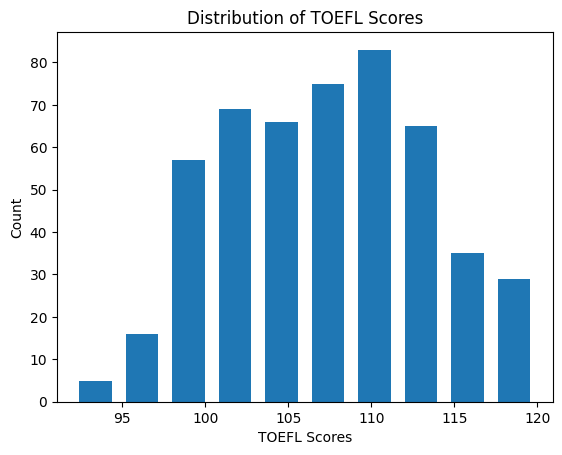

In [14]:
fig = plt.hist(df['TOEFL'], rwidth=0.7)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

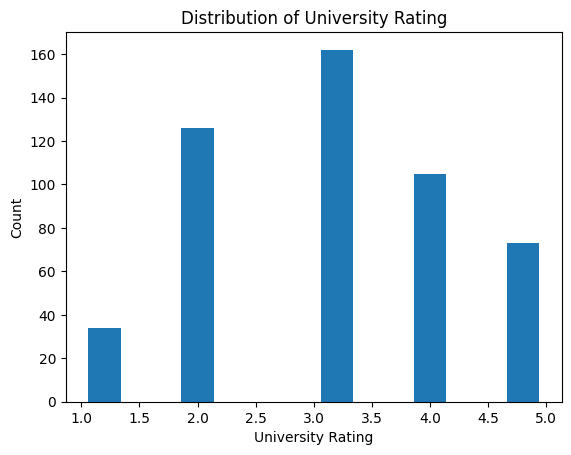

In [15]:
fig = plt.hist(df['University Rating'], rwidth=0.7)
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

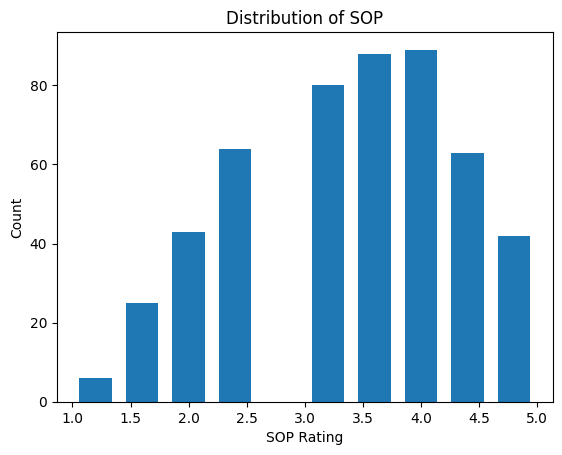

In [16]:
fig = plt.hist(df['SOP'], rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

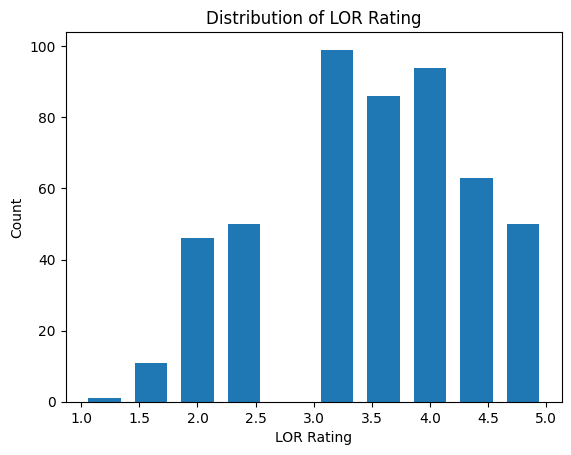

In [17]:
fig = plt.hist(df['LOR'], rwidth=0.7)
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

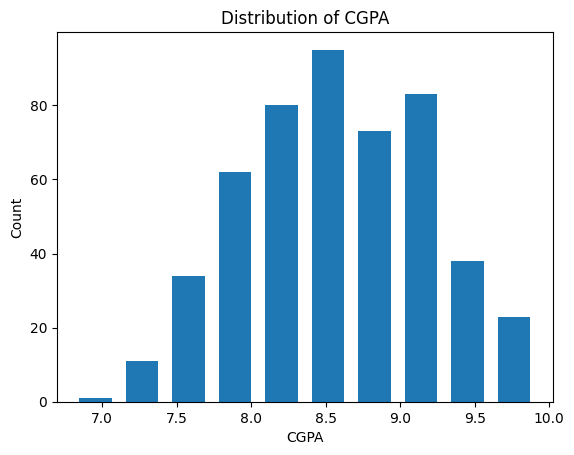

In [18]:
fig = plt.hist(df['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

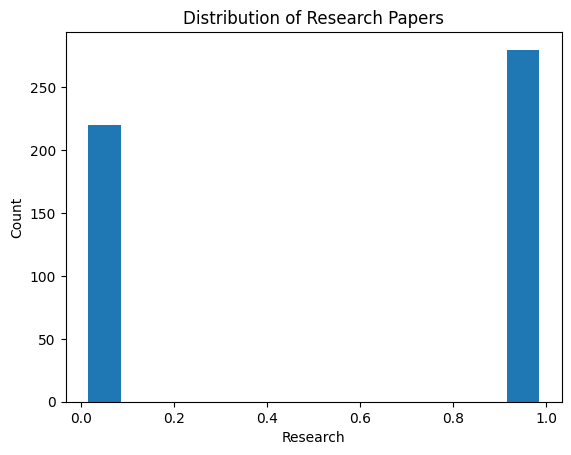

In [19]:
fig = plt.hist(df['Research'], rwidth=0.7)
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

In [20]:
df.drop('Serial No.', axis='columns', inplace=True)

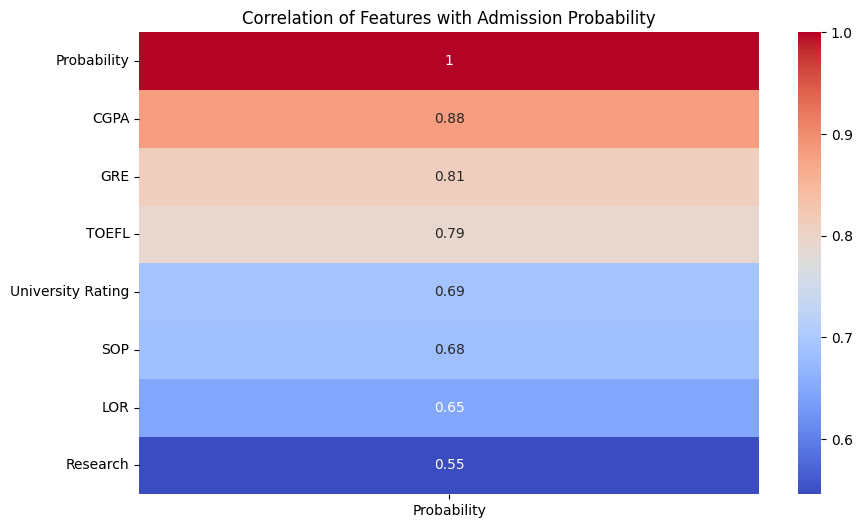

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['Probability']].sort_values(by='Probability', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Admission Probability')
plt.show()

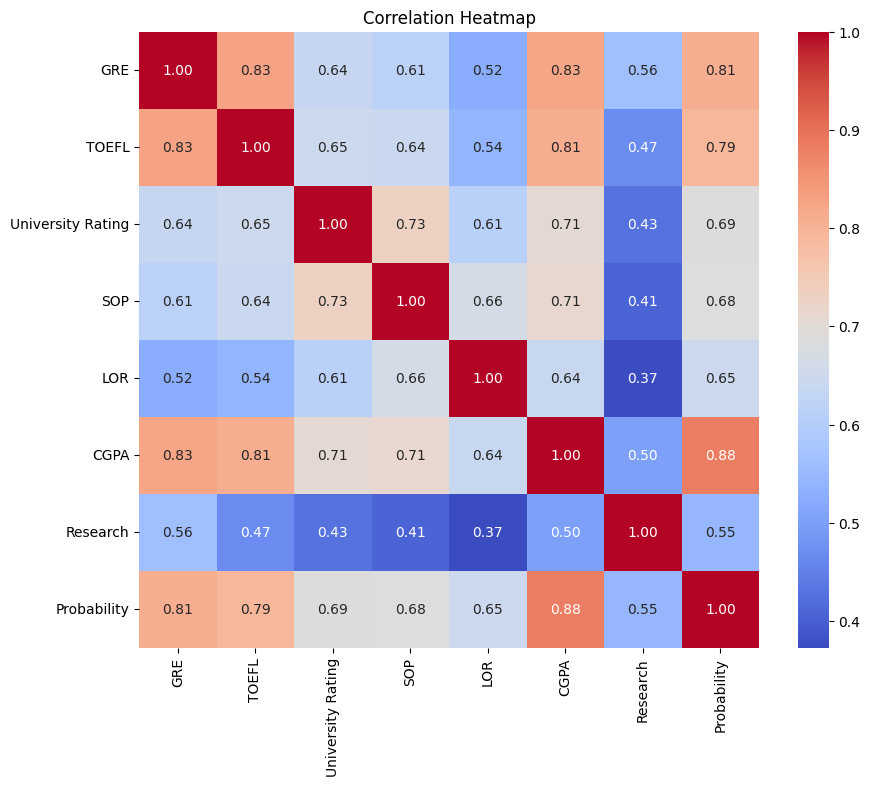

In [32]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

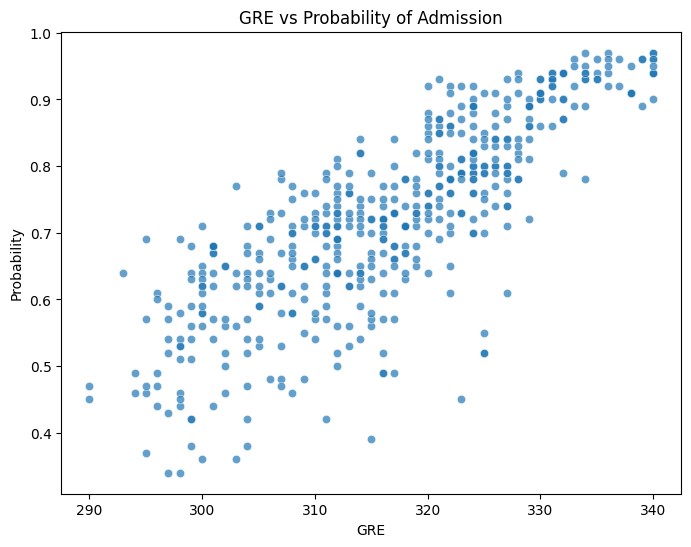

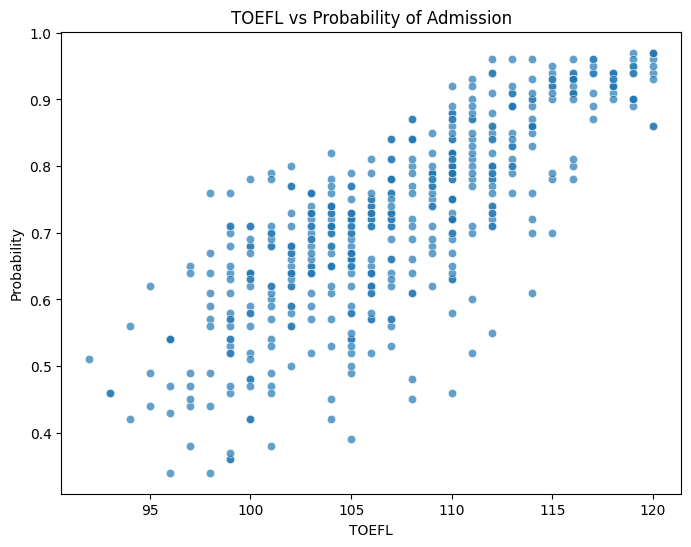

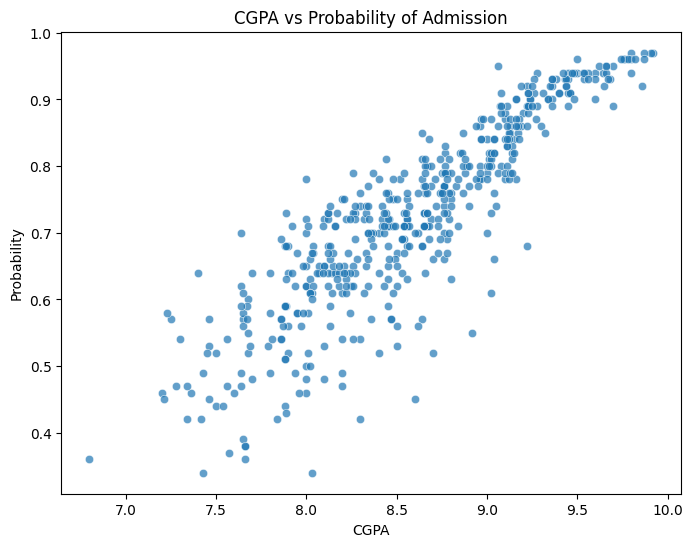

In [22]:
features = ['GRE', 'TOEFL', 'CGPA']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='Probability', alpha=0.7)
    plt.title(f'{feature} vs Probability of Admission')
    plt.xlabel(feature)
    plt.ylabel('Probability')
    plt.show()

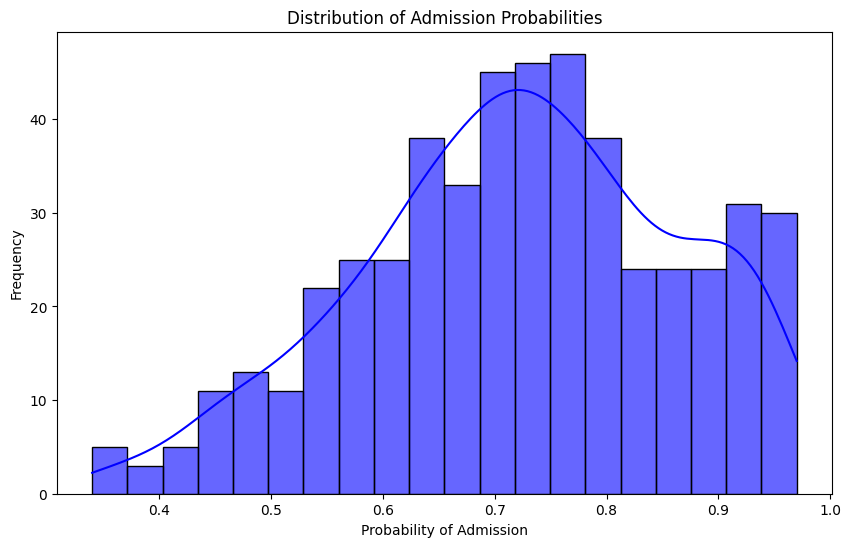

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Probability'], bins=20, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Admission Probabilities')
plt.xlabel('Probability of Admission')
plt.ylabel('Frequency')
plt.show()

In [24]:
df_copy = df.copy(deep=True)
df_copy[['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA']] = df_copy[
    ['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

,0
GRE,0
TOEFL,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Probability,0


In [25]:
X = df_copy.drop('Probability', axis='columns')
y = df_copy['Probability']

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import numpy as np

def evaluate_models(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        "Linear Regression": (LinearRegression(),
                              "Default parameters"),
        "Lasso": (Lasso(alpha=0.1),
                  "alpha=0.1"),
        "SVR": (SVR(C=10, gamma="scale"),
                "C=10, gamma='scale'"),
        "Decision Tree":
         (DecisionTreeRegressor(max_depth=5, criterion="squared_error", splitter="best"),
                          "max_depth=5, criterion='squared_error', splitter='best'"),
        "KNN": (KNeighborsRegressor(n_neighbors=10),
                "n_neighbors=10"),
        "Random Forest": (RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
                          "n_estimators=200, max_depth=10, random_state=42"),
    }

    models["Voting Regressor"] = (
        VotingRegressor(
            estimators=[
                ("lr", LinearRegression()),
                ("svr", SVR(C=10, gamma="scale")),
                ("dt", DecisionTreeRegressor(max_depth=5, criterion="squared_error", splitter="best")),
                ("knn", KNeighborsRegressor(n_neighbors=10)),
            ]
        ),
        "Combination of Linear Regression, SVR, Decision Tree, and KNN",
    )

    models["Stacking Regressor"] = (
        StackingRegressor(
            estimators=[
                ("lr", LinearRegression()),
                ("svr", SVR(C=10, gamma="scale")),
                ("dt", DecisionTreeRegressor(max_depth=5, criterion="squared_error", splitter="best")),
                ("knn", KNeighborsRegressor(n_neighbors=10)),
            ],
            final_estimator=RandomForestRegressor(n_estimators=50, random_state=42),
        ),
        "Combination of Linear Regression, SVR, Decision Tree, and KNN with Random Forest as meta-model",
    )

    results = []
    for name, (model, params) in models.items():
        if name in ["SVR", "KNN", "Voting Regressor", "Stacking Regressor"]:
            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        results.append({"Model": name, "Parameters": params, "MSE": mse, "RMSE": rmse, "R2 Score": r2})

    return pd.DataFrame(results)

results = evaluate_models(X_train, X_test, y_train, y_test)

display(results)


,Model,Parameters,MSE,RMSE,R2 Score
0,Linear Regression,Default parameters,0.003705,0.060866,0.818843
1,Lasso,alpha=0.1,0.015120,0.122964,0.260630
2,SVR,"C=10, gamma='scale'",0.005675,0.075333,0.722489
3,Decision Tree,"max_depth=5, criterion='squared_error', splitt...",0.006486,0.080534,0.682846
4,KNN,n_neighbors=10,0.004463,0.066803,0.781779
5,Random Forest,"n_estimators=200, max_depth=10, random_state=42",0.004228,0.065026,0.793234
6,Voting Regressor,"Combination of Linear Regression, Lasso, SVR, ...",0.004194,0.064762,0.794910
7,Stacking Regressor,"Combination of Linear Regression, Lasso, SVR, ...",0.004195,0.064771,0.794849


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_train, y_train)

r2_score = model.score(X_test, y_test)
print(f"Model R² Score on Test Set: {r2_score:.2f}")

feature_names = X.columns

input_data_1 = pd.DataFrame([[337, 118, 4, 4.5, 4.5, 9.65, 0]], columns=feature_names)

input_data_1_scaled = scaler.transform(input_data_1)

print('Chance of getting into a 4.5 rated University is {}%'.format(
    round(model.predict(input_data_1_scaled)[0] * 100, 3)))

Model R² Score on Test Set: 0.82
Chance of getting into a 4.5 rated University is 93.437%


In [31]:
def predict_admission():
    print("Enter your details to predict the chance of admission:")
    try:
        gre = float(input("GRE Score (e.g., 320): "))
        if not (260 <= gre <= 340):
            raise ValueError("GRE Score must be between 260 and 340.")

        toefl = float(input("TOEFL Score (e.g., 110): "))
        if not (0 <= toefl <= 120):
            raise ValueError("TOEFL Score must be between 0 and 120.")

        university_rating = float(input("University Rating (1-5): "))
        if not (1 <= university_rating <= 5):
            raise ValueError("University Rating must be between 1 and 5.")

        sop = float(input("SOP Rating (1.0-5.0): "))
        if not (1.0 <= sop <= 5.0):
            raise ValueError("SOP Rating must be between 1.0 and 5.0.")

        lor = float(input("LOR Rating (1.0-5.0): "))
        if not (1.0 <= lor <= 5.0):
            raise ValueError("LOR Rating must be between 1.0 and 5.0.")

        cgpa = float(input("CGPA (e.g., 9.65): "))
        if not (0.0 <= cgpa <= 10.0):
            raise ValueError("CGPA must be between 0.0 and 10.0.")

        research = int(input("Research Experience (0 = No, 1 = Yes): "))
        if research not in [0, 1]:
            raise ValueError("Research Experience must be 0 or 1.")

        input_data = pd.DataFrame([[gre, toefl, university_rating, sop, lor, cgpa, research]],
                                  columns=X.columns)

        input_data_scaled = scaler.transform(input_data)

        prediction = model.predict(input_data_scaled)[0]
        prediction_clipped = max(0, min(prediction, 1))

        chance = round(prediction_clipped * 100, 2)
        print(f"Chance of getting admission: {chance}%")

    except Exception as e:
        print(f"Error: {e}")

predict_admission()


Enter your details to predict the chance of admission:
GRE Score (e.g., 320): 340
TOEFL Score (e.g., 110): 120
University Rating (1-5): 5
SOP Rating (1.0-5.0): 5
LOR Rating (1.0-5.0): 5
CGPA (e.g., 9.65): 10
Research Experience (0 = No, 1 = Yes): 1
Chance of getting admission: 100%


This project focuses on predicting graduate admission probabilities using machine learning models. The dataset, sourced from Kaggle, includes features such as GRE and TOEFL scores, CGPA, university ratings, SOP and LOR ratings, and research experience. Data preprocessing involved handling missing values, standardizing numerical features, and splitting the dataset into training and testing subsets.

Various models were implemented and evaluated, including Linear Regression, Lasso Regression, Support Vector Regression (SVR), Decision Trees, Random Forests, and ensemble methods like Voting and Stacking Regressors. Each model was assessed based on Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score. Linear Regression emerged as the best-performing model, with an R² score of 0.82 and the lowest RMSE, demonstrating its suitability for the dataset's predominantly linear trends. Ensemble methods like Voting and Stacking Regressors offered robust predictions but did not outperform Linear Regression due to the dataset’s characteristics and size. More details regarding the steps implemented in this project code are mentioned in our report.

The project also developed an interactive prediction function, allowing students to input their profiles and receive personalized insights into their admission probabilities. The system highlights key predictors like CGPA, GRE, and TOEFL, providing actionable recommendations for improvement.